In [98]:
#!pip install praw

# Authentication

In [99]:
import praw

user_agent = "Reddit_Scrapper 1.0 by /u/FeatureChoice5036"
reddit = praw.Reddit(
    client_id="oVDzjGui9RAiE1taFeIFog",
    client_secret="bMKZ_AVje1BJ8_Mm-D3S9xP5ByRWfA",
    user_agent=user_agent
)

In [100]:
import pandas as pd
import numpy as np
import re #RegEx : Regular expression

## Get Trending Topic from your Subreddit

The **"cricket"** subreddit channel will be use for this project

In [101]:
# Hot new rising topics

headlines = set()
for submission in reddit.subreddit("Cricket").hot(limit=None):
    print(submission.title)#Subreddit Title
    print(submission.id) #ID
    print(submission.author) #Author of the subreddit
    print(submission.created_utc) #Date and time being created
    print(submission.score) # Average Score
    print(submission.upvote_ratio) # Upvote ratio
    print(submission.url) # Like to the Subreddit
    break
    headlines.add(submission.title)
print(len(headlines))

Daily General Discussion and Match Links Thread - February 14, 2024
1aqaozw
AutoModerator
1707874209.0
8
0.9
https://www.reddit.com/r/Cricket/comments/1aqaozw/daily_general_discussion_and_match_links_thread/
0


**Get total comment in Subreddit**

In [102]:
headlines = set()
for submission in reddit.subreddit("Cricket").hot(limit=None):
    headlines.add(submission.title)
print(len(headlines))

980


In [103]:
#Create a dataframe from the scrapped data 
cricket_df = pd.DataFrame(headlines)
cricket_df.head()

,0
0,"Ritika Sajdeh, Rohit Sharma's wife, says ""So m..."
1,James Anderson made his Test debut before Shoa...
2,'A good kick in the pants': Ian Smith remind...
3,Rohit feels India were not 'brave enough' in H...
4,Jasprit Bumrah equals Nuwan Pradeep's record o...


In [104]:
#df = df.iloc[:, 1:]
cricket_df.head()

,0
0,"Ritika Sajdeh, Rohit Sharma's wife, says ""So m..."
1,James Anderson made his Test debut before Shoa...
2,'A good kick in the pants': Ian Smith remind...
3,Rohit feels India were not 'brave enough' in H...
4,Jasprit Bumrah equals Nuwan Pradeep's record o...


In [105]:
cricket_df.columns

RangeIndex(start=0, stop=1, step=1)

In [106]:
cricket_df.columns = ['Titles']

In [107]:
cricket_df.head()

,Titles
0,"Ritika Sajdeh, Rohit Sharma's wife, says ""So m..."
1,James Anderson made his Test debut before Shoa...
2,'A good kick in the pants': Ian Smith remind...
3,Rohit feels India were not 'brave enough' in H...
4,Jasprit Bumrah equals Nuwan Pradeep's record o...


In [108]:
cricket_df.Titles.duplicated().sum() 

0

In [109]:
#Clean the text

#Create a function to clean the tweets
def cleanTxt(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text) #Remove @mentions replace with blank
    text = re.sub(r'#', '', text) #Remove the '#' symbol, replace with blank
    text = re.sub(r'RT[\s]+', '', text) #Removing RT, replace with blank
    text = re.sub(r'https?:\/\/\S+', '', text) #Remove the hyperlinks
    text = re.sub(r':', '', text) # Remove :
    
    return text

#Cleaning the text
cricket_df["Titles"]= cricket_df["Titles"].apply(cleanTxt)

#Show the clean text
cricket_df.head()

,Titles
0,"Ritika Sajdeh, Rohit Sharma's wife, says ""So m..."
1,James Anderson made his Test debut before Shoa...
2,'A good kick in the pants' Ian Smith reminds...
3,Rohit feels India were not 'brave enough' in H...
4,Jasprit Bumrah equals Nuwan Pradeep's record o...


In [110]:
#Next we have to remove emoji & Unicode from the reddit data.
def remove_emoji(string):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

#Cleaning the text
cricket_df["Titles"]= cricket_df["Titles"].apply(remove_emoji)

#Show the clean text
cricket_df.head()

,Titles
0,"Ritika Sajdeh, Rohit Sharma's wife, says ""So m..."
1,James Anderson made his Test debut before Shoa...
2,'A good kick in the pants' Ian Smith reminds...
3,Rohit feels India were not 'brave enough' in H...
4,Jasprit Bumrah equals Nuwan Pradeep's record o...


In [111]:
#!pip install textblob

In [112]:
from textblob import TextBlob
from wordcloud import WordCloud, STOPWORDS

In [113]:
#Create a function to get the subjectivity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

#Create a function to get Polarity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

#Now we create a new column for what we just did and add it to the Tweet_df dataframe
cricket_df['Subjectivity'] = cricket_df['Titles'].apply(getSubjectivity)
cricket_df['Polarity'] = cricket_df['Titles'].apply(getPolarity)

#Now display data
cricket_df.head()

,Titles,Subjectivity,Polarity
0,"Ritika Sajdeh, Rohit Sharma's wife, says ""So m...",0.70,0.0
1,James Anderson made his Test debut before Shoa...,0.00,0.0
2,'A good kick in the pants' Ian Smith reminds...,0.60,0.7
3,Rohit feels India were not 'brave enough' in H...,0.75,-0.2
4,Jasprit Bumrah equals Nuwan Pradeep's record o...,0.00,0.0


In [114]:
#Group the range of Polarity to different categories
def getInsight(score):
    if score < 0:
        return "Negative"
    elif score == 0:
        return "Neutral"
    else:
        return "Positive"
    
cricket_df["Insight"] = cricket_df["Polarity"].apply(getInsight)

cricket_df.head(50)

,Titles,Subjectivity,Polarity,Insight
0,"Ritika Sajdeh, Rohit Sharma's wife, says ""So m...",0.700000,0.000000,Neutral
1,James Anderson made his Test debut before Shoa...,0.000000,0.000000,Neutral
2,'A good kick in the pants' Ian Smith reminds...,0.600000,0.700000,Positive
3,Rohit feels India were not 'brave enough' in H...,0.750000,-0.200000,Negative
4,Jasprit Bumrah equals Nuwan Pradeep's record o...,0.000000,0.000000,Neutral
5,Which player has the biggest difference in sta...,0.000000,0.000000,Neutral
6,T20 cricket has created the world’s best Test ...,0.300000,1.000000,Positive
7,Ollie Pope scored his 5th Test century with 19...,0.000000,0.000000,Neutral
8,"Match Thread Ranji Trophy, Group Stage, Round ...",0.400000,-0.200000,Negative
9,Rehan Ahmed delayed at Rajkot Airport as Engla...,0.000000,0.000000,Neutral


# Data Visualization

In [115]:
import seaborn as sns
import warnings
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

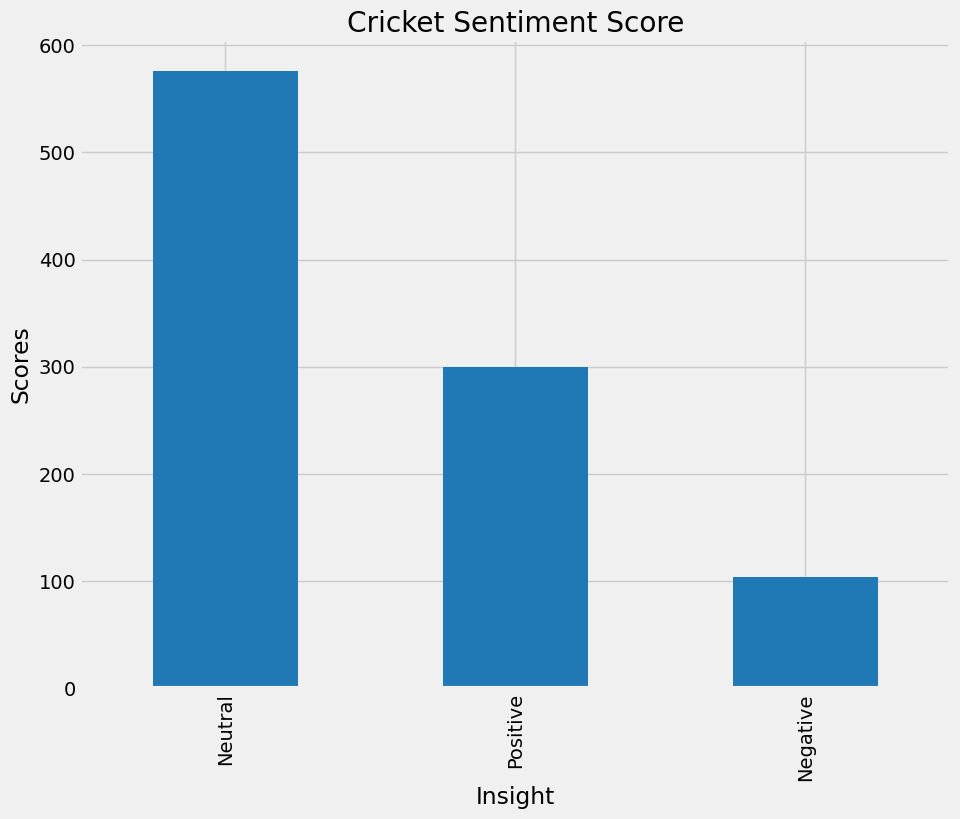

In [116]:
#Plot the values count of sentiment
plt.title("Cricket Sentiment Score")
plt.xlabel("Sentiment")
plt.ylabel("Scores")
plt.rcParams["figure.figsize"] = (10,8)
cricket_df["Insight"].value_counts().plot(kind="bar", color="#2078B4")
plt.show()

# Wordcloud

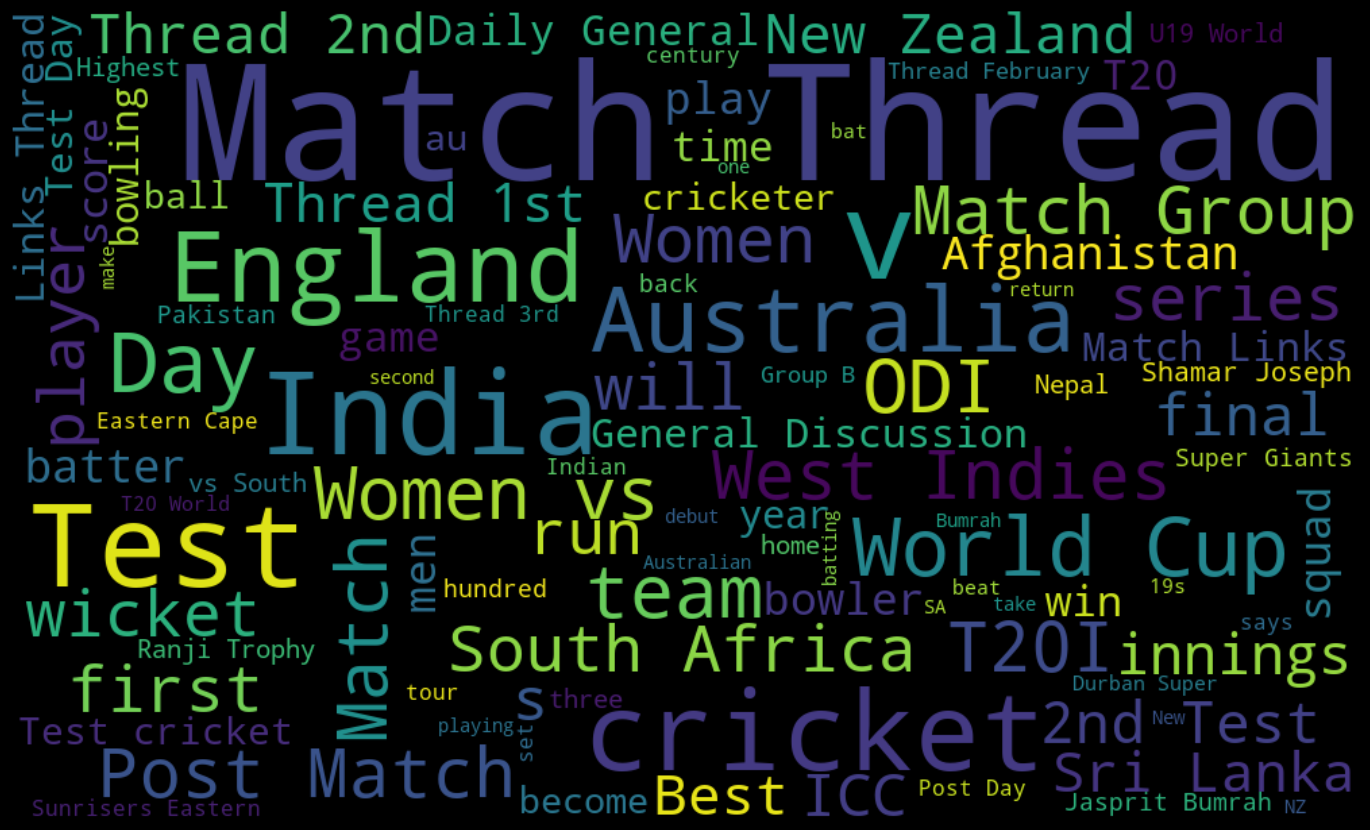

In [117]:
text = ' '.join( [twts for twts in cricket_df['Titles']] ) #To join all tweet
    # generate word cloud 
wordcloud = WordCloud(width=1000, height = 600,
                      
                      max_words = 100,
                      stopwords = STOPWORDS,
                      background_color="black").generate(text)

  # Display the generated image:
plt.figure( figsize=(20,10), facecolor='k' )
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off");

In [118]:
import nltk
nltk.download('stopwords')
stopwords = set(nltk.corpus.stopwords.words('english'))
print(stopwords)

{'themselves', 'needn', 'being', 'does', 'because', "won't", 'then', "wasn't", 'i', "doesn't", 'whom', 'under', 'to', 'here', 'some', 'out', 'those', 'aren', 'when', 'shan', "you'll", 'so', "don't", 'just', 'from', 'ours', 'won', 'he', 'don', 'she', "didn't", 'all', 'himself', 'between', 'mightn', 'am', 't', 'but', 'too', 'm', 'o', 'did', 'doing', 'me', "haven't", 'now', "weren't", 'shouldn', 'can', 'above', 'which', "that'll", 'until', 'in', 'myself', 'that', 'of', 'an', 'as', 'off', 'yourselves', 'no', 'your', 'ain', "shan't", 'our', "she's", 'a', 'her', "it's", 'yourself', 'these', 'they', 'were', 'ma', 'below', 'the', 'why', 'before', 'down', 'most', 'them', 'through', 'will', 'be', 'by', "needn't", 'itself', 'with', 'hasn', 'very', 'his', "should've", 'on', 'we', 'not', "wouldn't", 'how', 'should', 'each', 'up', 'is', 'where', 'll', "you'd", 'their', 'after', 'my', 're', 'hers', 'wouldn', 'again', "mustn't", 'wasn', 've', 'what', 'about', 'such', 'hadn', "hasn't", "you've", 'if', 

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mohan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mohan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


                                                   text  \
7502  On behalf of the people and the Government of ...   
7503  \nSeventy years have passed since the establis...   
7504  I should like to congratulate the President an...   
7505  I would like to begin by thanking the Secretar...   
7506  Allow me at the outset to extend to Mr. Mogens...   

                                            cleantokens  
7502  [behalf, people, Government, Yemen,, would, li...  
7503  [Seventy, years, passed, since, establishment,...  
7504  [like, congratulate, President, country,, Denm...  
7505  [would, like, begin, thanking, Secretary-Gener...  
7506  [Allow, outset, extend, Mr., Mogens, Lykketoft...  


In [ ]:
## Dataset

In [122]:

cricket_df.head()

,Titles,Subjectivity,Polarity,Insight
0,"Ritika Sajdeh, Rohit Sharma's wife, says ""So m...",0.70,0.0,Neutral
1,James Anderson made his Test debut before Shoa...,0.00,0.0,Neutral
2,'A good kick in the pants' Ian Smith reminds...,0.60,0.7,Positive
3,Rohit feels India were not 'brave enough' in H...,0.75,-0.2,Negative
4,Jasprit Bumrah equals Nuwan Pradeep's record o...,0.00,0.0,Neutral


In [ ]:
## Dataset information

In [123]:
#GEt the info about the dataset
cricket_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 980 entries, 0 to 979
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Titles        980 non-null    object 
 1   Subjectivity  980 non-null    float64
 2   Polarity      980 non-null    float64
 3   Insight       980 non-null    object 
dtypes: float64(2), object(2)
memory usage: 30.8+ KB


In [124]:
cricket_df.describe()

,Subjectivity,Polarity
count,980.000000,980.000000
mean,0.248012,0.081923
std,0.319543,0.260254
min,0.000000,-1.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.454545,0.125000
max,1.000000,1.000000


In [134]:
# Checking for duplicate titles in the Bitcoin DataFrame and counting the occurrences
cricket_df.Titles.duplicated().sum() 

0

In [135]:
#df.isna().sum() output will show the count of missing values for each column in your DataFrame.
cricket_df.isna().sum()

Titles          0
Subjectivity    0
Polarity        0
Insight         0
dtype: int64

In [136]:
#df['Titles'] = df['Titles'].str.upper(): Converts the values in the 'speaker' column to uppercase.


cricket_df['Titles'] = cricket_df['Titles'].str.upper()
print (cricket_df)

                                                Titles  Subjectivity  \
0    RITIKA SAJDEH, ROHIT SHARMA'S WIFE, SAYS "SO M...         0.700   
1    JAMES ANDERSON MADE HIS TEST DEBUT BEFORE SHOA...         0.000   
2    'A GOOD KICK IN THE PANTS' IAN SMITH REMINDS...         0.600   
3    ROHIT FEELS INDIA WERE NOT 'BRAVE ENOUGH' IN H...         0.750   
4    JASPRIT BUMRAH EQUALS NUWAN PRADEEP'S RECORD O...         0.000   
..                                                 ...           ...   
975                           UGANDA TOUR TO SRI LANKA         0.000   
976  JOE ROOT HAS MORE TEST RUNS THAN INDIA'S ENTIR...         0.375   
977  [VIZAG TEST] PERSONAL BELONGINGS AT STADIUM - ...         0.300   
978  NEPAL'S TWO DIFFERENT SQUADS ANNOUNCED FOR CAN...         0.600   
979    THE STATISTICALLY BEST SA20 BATTERS AND BOWLERS         0.300   

     Polarity   Insight  
0    0.000000   Neutral  
1    0.000000   Neutral  
2    0.700000  Positive  
3   -0.200000  Negative  
4    

In [143]:
!pip install regex
import regex as re
import pandas as pd

def tokenize(Titles):
    return re.findall(r'[\w-]*[a-zA-Z][\w-]*', Titles)


cricket_df['tokenized_Titles'] = cricket_df['Titles'].apply(lambda x: tokenize(str(x)))

# Display the DataFrame with the tokenized titles
print(cricket_df[['Titles', 'tokenized_Titles']].head())

                                              Titles  \
0  RITIKA SAJDEH, ROHIT SHARMA'S WIFE, SAYS "SO M...   
1  JAMES ANDERSON MADE HIS TEST DEBUT BEFORE SHOA...   
2  'A GOOD KICK IN THE PANTS' IAN SMITH REMINDS...   
3  ROHIT FEELS INDIA WERE NOT 'BRAVE ENOUGH' IN H...   
4  JASPRIT BUMRAH EQUALS NUWAN PRADEEP'S RECORD O...   

                                    tokenized_Titles  
0  [RITIKA, SAJDEH, ROHIT, SHARMA, S, WIFE, SAYS,...  
1  [JAMES, ANDERSON, MADE, HIS, TEST, DEBUT, BEFO...  
2  [A, GOOD, KICK, IN, THE, PANTS, IAN, SMITH, RE...  
3  [ROHIT, FEELS, INDIA, WERE, NOT, BRAVE, ENOUGH...  
4  [JASPRIT, BUMRAH, EQUALS, NUWAN, PRADEEP, S, R...  


In [144]:
import regex as re
import pandas as pd

def tokenize(Titles):
    return re.findall(r'[\w-]*[a-z|A-Z][\w-]*', Titles)
    
cricket_df['tokenized_Titles'] = cricket_df['Titles'].apply(lambda x: tokenize(str(x)))

# Display the DataFrame with the tokenized titles
print(cricket_df[['Titles', 'tokenized_Titles']].head())

                                              Titles  \
0  RITIKA SAJDEH, ROHIT SHARMA'S WIFE, SAYS "SO M...   
1  JAMES ANDERSON MADE HIS TEST DEBUT BEFORE SHOA...   
2  'A GOOD KICK IN THE PANTS' IAN SMITH REMINDS...   
3  ROHIT FEELS INDIA WERE NOT 'BRAVE ENOUGH' IN H...   
4  JASPRIT BUMRAH EQUALS NUWAN PRADEEP'S RECORD O...   

                                    tokenized_Titles  
0  [RITIKA, SAJDEH, ROHIT, SHARMA, S, WIFE, SAYS,...  
1  [JAMES, ANDERSON, MADE, HIS, TEST, DEBUT, BEFO...  
2  [A, GOOD, KICK, IN, THE, PANTS, IAN, SMITH, RE...  
3  [ROHIT, FEELS, INDIA, WERE, NOT, BRAVE, ENOUGH...  
4  [JASPRIT, BUMRAH, EQUALS, NUWAN, PRADEEP, S, R...  


In [145]:
import pandas as pd
import nltk


stopwords = set(nltk.corpus.stopwords.words('english'))

# Define the tokenize function (replace with your actual tokenize implementation)
def tokenize(Titles):
    return re.findall(r'\b\w+\b', Titles)

# Define the remove_stop function
def remove_stop(tokens):
    return [t for t in tokens if t.lower() not in stopwords]

# Define the text preparation pipeline
pipeline = [str.lower, tokenize, remove_stop]

# Define the prepare function
def prepare(Titles, pipeline):
    tokens = Titles
    for fun in pipeline:
        tokens = fun(tokens)
    return tokens


cricket_df['processed_Titles'] = cricket_df['Titles'].apply(lambda x: prepare(str(x), pipeline))

# Display the DataFrame with the processed text
print(cricket_df[['Titles', 'processed_Titles']].tail())


                                                Titles  \
975                           UGANDA TOUR TO SRI LANKA   
976  JOE ROOT HAS MORE TEST RUNS THAN INDIA'S ENTIR...   
977  [VIZAG TEST] PERSONAL BELONGINGS AT STADIUM - ...   
978  NEPAL'S TWO DIFFERENT SQUADS ANNOUNCED FOR CAN...   
979    THE STATISTICALLY BEST SA20 BATTERS AND BOWLERS   

                                      processed_Titles  
975                         [uganda, tour, sri, lanka]  
976  [joe, root, test, runs, india, entire, squad, ...  
977  [vizag, test, personal, belongings, stadium, b...  
978  [nepal, two, different, squads, announced, can...  
979      [statistically, best, sa20, batters, bowlers]  


In [147]:
import pandas as pd
import regex as re

# Define the pipeline
pipeline = [str.lower, tokenize, remove_stop]

# Define the tokenize function
def tokenize(Titles):
    return re.findall(r'[\w-]*[a-z|A-Z][\w-]*', Titles)

# Define the remove_stop function
def remove_stop(tokens):
    return [t for t in tokens if t.lower() not in stopwords]

# Define the prepare function
def prepare(Titles, pipeline):
    tokens = Titles
    for fun in pipeline:
        tokens = fun(tokens)
    return tokens


cricket_df['tokens'] = cricket_df['Titles'].apply(lambda x: prepare(str(x), pipeline=pipeline))

# Display the DataFrame with the processed tokens
print(cricket_df[['Titles', 'tokens']].head())

                                              Titles  \
0  RITIKA SAJDEH, ROHIT SHARMA'S WIFE, SAYS "SO M...   
1  JAMES ANDERSON MADE HIS TEST DEBUT BEFORE SHOA...   
2  'A GOOD KICK IN THE PANTS' IAN SMITH REMINDS...   
3  ROHIT FEELS INDIA WERE NOT 'BRAVE ENOUGH' IN H...   
4  JASPRIT BUMRAH EQUALS NUWAN PRADEEP'S RECORD O...   

                                              tokens  
0  [ritika, sajdeh, rohit, sharma, wife, says, ma...  
1  [james, anderson, made, test, debut, shoaib, b...  
2  [good, kick, pants, ian, smith, reminds, icc, ...  
3  [rohit, feels, india, brave, enough, hyderabad...  
4  [jasprit, bumrah, equals, nuwan, pradeep, reco...  


In [148]:
#count the tokens
cricket_df['num_tokens'] = cricket_df['tokens'].map(len)
cricket_df.tail()

,Titles,Subjectivity,Polarity,Insight,tokenized_Titles,processed_Titles,tokens,num_tokens
975,UGANDA TOUR TO SRI LANKA,0.000,0.000000,Neutral,"[UGANDA, TOUR, TO, SRI, LANKA]","[uganda, tour, sri, lanka]","[uganda, tour, sri, lanka]",4
976,JOE ROOT HAS MORE TEST RUNS THAN INDIA'S ENTIR...,0.375,0.166667,Positive,"[JOE, ROOT, HAS, MORE, TEST, RUNS, THAN, INDIA...","[joe, root, test, runs, india, entire, squad, ...","[joe, root, test, runs, india, entire, squad, ...",9
977,[VIZAG TEST] PERSONAL BELONGINGS AT STADIUM - ...,0.300,0.000000,Neutral,"[VIZAG, TEST, PERSONAL, BELONGINGS, AT, STADIU...","[vizag, test, personal, belongings, stadium, b...","[vizag, test, personal, belongings, stadium, b...",6
978,NEPAL'S TWO DIFFERENT SQUADS ANNOUNCED FOR CAN...,0.600,0.000000,Neutral,"[NEPAL, S, TWO, DIFFERENT, SQUADS, ANNOUNCED, ...","[nepal, two, different, squads, announced, can...","[nepal, two, different, squads, announced, can...",12
979,THE STATISTICALLY BEST SA20 BATTERS AND BOWLERS,0.300,1.000000,Positive,"[THE, STATISTICALLY, BEST, SA20, BATTERS, AND,...","[statistically, best, sa20, batters, bowlers]","[statistically, best, sa20, batters, bowlers]",5


In [149]:
#Word frequency Analysis

from collections import Counter

tokens = tokenize("virat is a king of cricket.")

testcount= Counter(tokens)
print(testcount)

Counter({'virat': 1, 'is': 1, 'a': 1, 'king': 1, 'of': 1, 'cricket': 1})


In [150]:
#Adding new data to the current count

more_tokens = tokenize("vamika is a queen of india.")
testcount.update(more_tokens)
print(testcount)


Counter({'is': 2, 'a': 2, 'of': 2, 'virat': 1, 'king': 1, 'cricket': 1, 'vamika': 1, 'queen': 1, 'india': 1})


In [151]:
#Let’s count

counter = Counter()
cricket_df['tokens'].map(counter.update)
print(counter.most_common(5))

[('match', 371), ('thread', 276), ('vs', 243), ('test', 170), ('cricket', 114)]


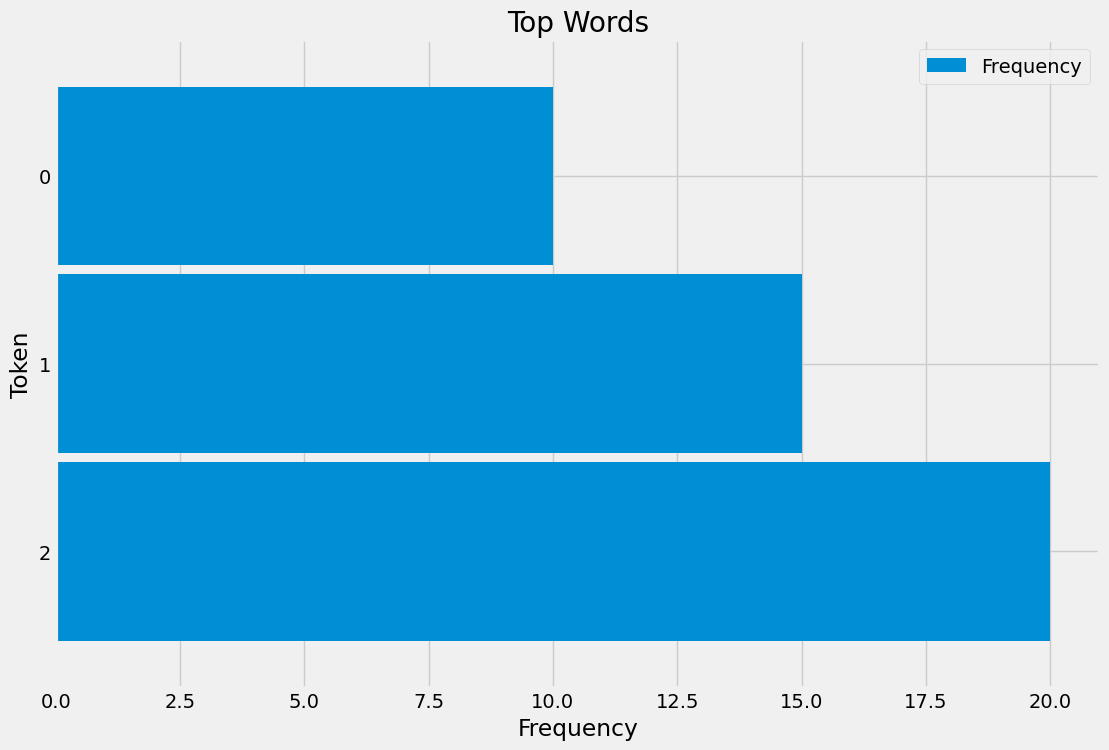

In [155]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming freq_Cricket_df is a DataFrame with columns 'Token' and 'Frequency'
# Example data, replace it with your actual data
data = {'Token': ['word1', 'word2', 'word3'], 'Frequency': [10, 15, 20]}
freq_Cricket_df = pd.DataFrame(data)

# Bar chart
ax = freq_Cricket_df.head(15).plot(kind='barh', width=0.95, figsize=(12, 8))
ax.invert_yaxis()
ax.set(xlabel='Frequency', ylabel='Token', title='Top Words')

# Show the plot
plt.show()


In [156]:
!pip install textblob

from textblob import TextBlob
from wordcloud import WordCloud, STOPWORDS

#Create a function to get the subjectivity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

#Create a function to get Polarity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

#Now we create a new column for what we just did and add it to the Tweet_df dataframe
cricket_df['Subjectivity'] = cricket_df['Titles'].apply(getSubjectivity)
cricket_df['Polarity'] = cricket_df['Titles'].apply(getPolarity)

#Now display data
cricket_df.head()

,Titles,Subjectivity,Polarity,Insight,tokenized_Titles,processed_Titles,tokens,num_tokens
0,"RITIKA SAJDEH, ROHIT SHARMA'S WIFE, SAYS ""SO M...",0.70,0.0,Neutral,"[RITIKA, SAJDEH, ROHIT, SHARMA, S, WIFE, SAYS,...","[ritika, sajdeh, rohit, sharma, wife, says, ma...","[ritika, sajdeh, rohit, sharma, wife, says, ma...",14
1,JAMES ANDERSON MADE HIS TEST DEBUT BEFORE SHOA...,0.00,0.0,Neutral,"[JAMES, ANDERSON, MADE, HIS, TEST, DEBUT, BEFO...","[james, anderson, made, test, debut, shoaib, b...","[james, anderson, made, test, debut, shoaib, b...",10
2,'A GOOD KICK IN THE PANTS' IAN SMITH REMINDS...,0.60,0.7,Positive,"[A, GOOD, KICK, IN, THE, PANTS, IAN, SMITH, RE...","[good, kick, pants, ian, smith, reminds, icc, ...","[good, kick, pants, ian, smith, reminds, icc, ...",10
3,ROHIT FEELS INDIA WERE NOT 'BRAVE ENOUGH' IN H...,0.75,-0.2,Negative,"[ROHIT, FEELS, INDIA, WERE, NOT, BRAVE, ENOUGH...","[rohit, feels, india, brave, enough, hyderabad...","[rohit, feels, india, brave, enough, hyderabad...",7
4,JASPRIT BUMRAH EQUALS NUWAN PRADEEP'S RECORD O...,0.00,0.0,Neutral,"[JASPRIT, BUMRAH, EQUALS, NUWAN, PRADEEP, S, R...","[jasprit, bumrah, equals, nuwan, pradeep, reco...","[jasprit, bumrah, equals, nuwan, pradeep, reco...",9


In [157]:
#Group the range of Polarity to different categories
def getInsight(score):
    if score < 0:
        return "Negative"
    elif score == 0:
        return "Neutral"
    else:
        return "Positive"

# Apply the getInsight function to the "Polarity" column of the DataFrame
# and store the resulting sentiment insights in a new column named "Insight"   
cricket_df["Insight"] = cricket_df["Polarity"].apply(getInsight)

# Display the first 50 rows of the DataFrame with the newly added "Insight" column
cricket_df.head(50)

,Titles,Subjectivity,Polarity,Insight,tokenized_Titles,processed_Titles,tokens,num_tokens
0,"RITIKA SAJDEH, ROHIT SHARMA'S WIFE, SAYS ""SO M...",0.700000,0.000000,Neutral,"[RITIKA, SAJDEH, ROHIT, SHARMA, S, WIFE, SAYS,...","[ritika, sajdeh, rohit, sharma, wife, says, ma...","[ritika, sajdeh, rohit, sharma, wife, says, ma...",14
1,JAMES ANDERSON MADE HIS TEST DEBUT BEFORE SHOA...,0.000000,0.000000,Neutral,"[JAMES, ANDERSON, MADE, HIS, TEST, DEBUT, BEFO...","[james, anderson, made, test, debut, shoaib, b...","[james, anderson, made, test, debut, shoaib, b...",10
2,'A GOOD KICK IN THE PANTS' IAN SMITH REMINDS...,0.600000,0.700000,Positive,"[A, GOOD, KICK, IN, THE, PANTS, IAN, SMITH, RE...","[good, kick, pants, ian, smith, reminds, icc, ...","[good, kick, pants, ian, smith, reminds, icc, ...",10
3,ROHIT FEELS INDIA WERE NOT 'BRAVE ENOUGH' IN H...,0.750000,-0.200000,Negative,"[ROHIT, FEELS, INDIA, WERE, NOT, BRAVE, ENOUGH...","[rohit, feels, india, brave, enough, hyderabad...","[rohit, feels, india, brave, enough, hyderabad...",7
4,JASPRIT BUMRAH EQUALS NUWAN PRADEEP'S RECORD O...,0.000000,0.000000,Neutral,"[JASPRIT, BUMRAH, EQUALS, NUWAN, PRADEEP, S, R...","[jasprit, bumrah, equals, nuwan, pradeep, reco...","[jasprit, bumrah, equals, nuwan, pradeep, reco...",9
5,WHICH PLAYER HAS THE BIGGEST DIFFERENCE IN STA...,0.000000,0.000000,Neutral,"[WHICH, PLAYER, HAS, THE, BIGGEST, DIFFERENCE,...","[player, biggest, difference, stats, captaining]","[player, biggest, difference, stats, captaining]",5
6,T20 CRICKET HAS CREATED THE WORLD’S BEST TEST ...,0.300000,1.000000,Positive,"[T20, CRICKET, HAS, CREATED, THE, WORLD, S, BE...","[t20, cricket, created, world, best, test, bow...","[t20, cricket, created, world, best, test, bow...",9
7,OLLIE POPE SCORED HIS 5TH TEST CENTURY WITH 19...,0.000000,0.000000,Neutral,"[OLLIE, POPE, SCORED, HIS, 5TH, TEST, CENTURY,...","[ollie, pope, scored, 5th, test, century, 196,...","[ollie, pope, scored, 5th, test, century, runs...",8
8,"MATCH THREAD RANJI TROPHY, GROUP STAGE, ROUND ...",0.400000,-0.200000,Negative,"[MATCH, THREAD, RANJI, TROPHY, GROUP, STAGE, R...","[match, thread, ranji, trophy, group, stage, r...","[match, thread, ranji, trophy, group, stage, r...",8
9,REHAN AHMED DELAYED AT RAJKOT AIRPOAS ENGLAND ...,0.000000,0.000000,Neutral,"[REHAN, AHMED, DELAYED, AT, RAJKOT, AIRPOAS, E...","[rehan, ahmed, delayed, rajkot, airpoas, engla...","[rehan, ahmed, delayed, rajkot, airpoas, engla...",9


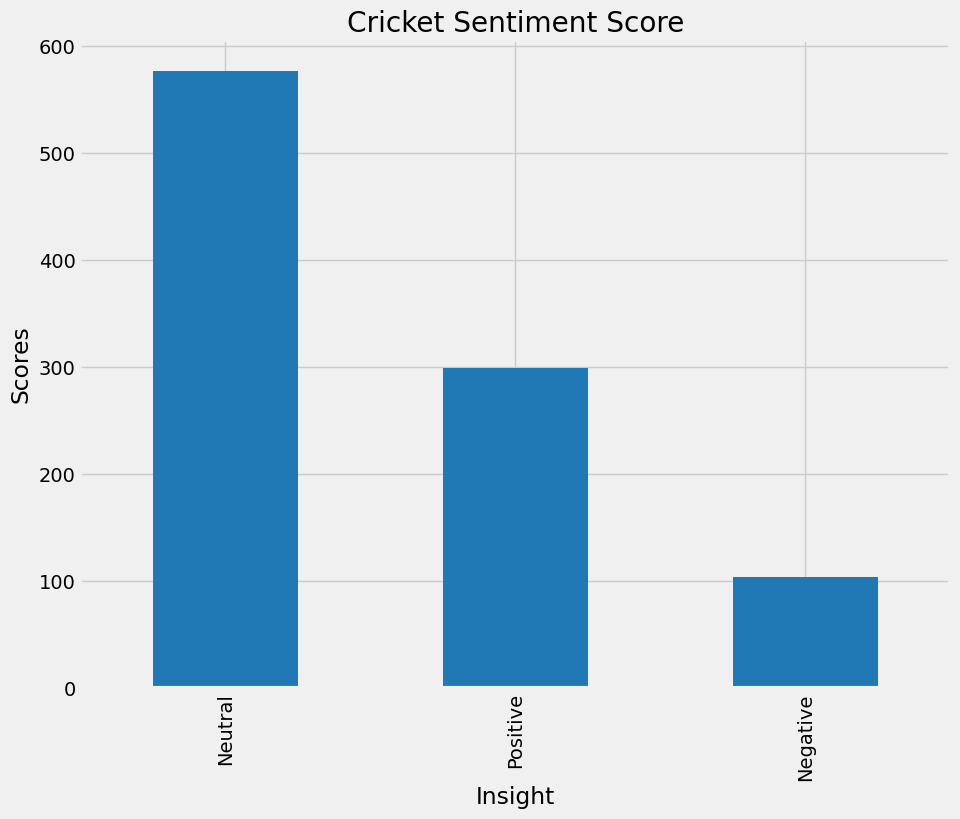

In [158]:
import seaborn as sns
import warnings
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Suppress warnings
warnings.filterwarnings("ignore")

# Set the plotting style
plt.style.use('fivethirtyeight')

#Plot the values count of sentiment
plt.title("Cricket Sentiment Score")
plt.xlabel("Sentiment")
plt.ylabel("Scores")
plt.rcParams["figure.figsize"] = (10,8)
cricket_df["Insight"].value_counts().plot(kind="bar", color="#2078B4")
plt.show()

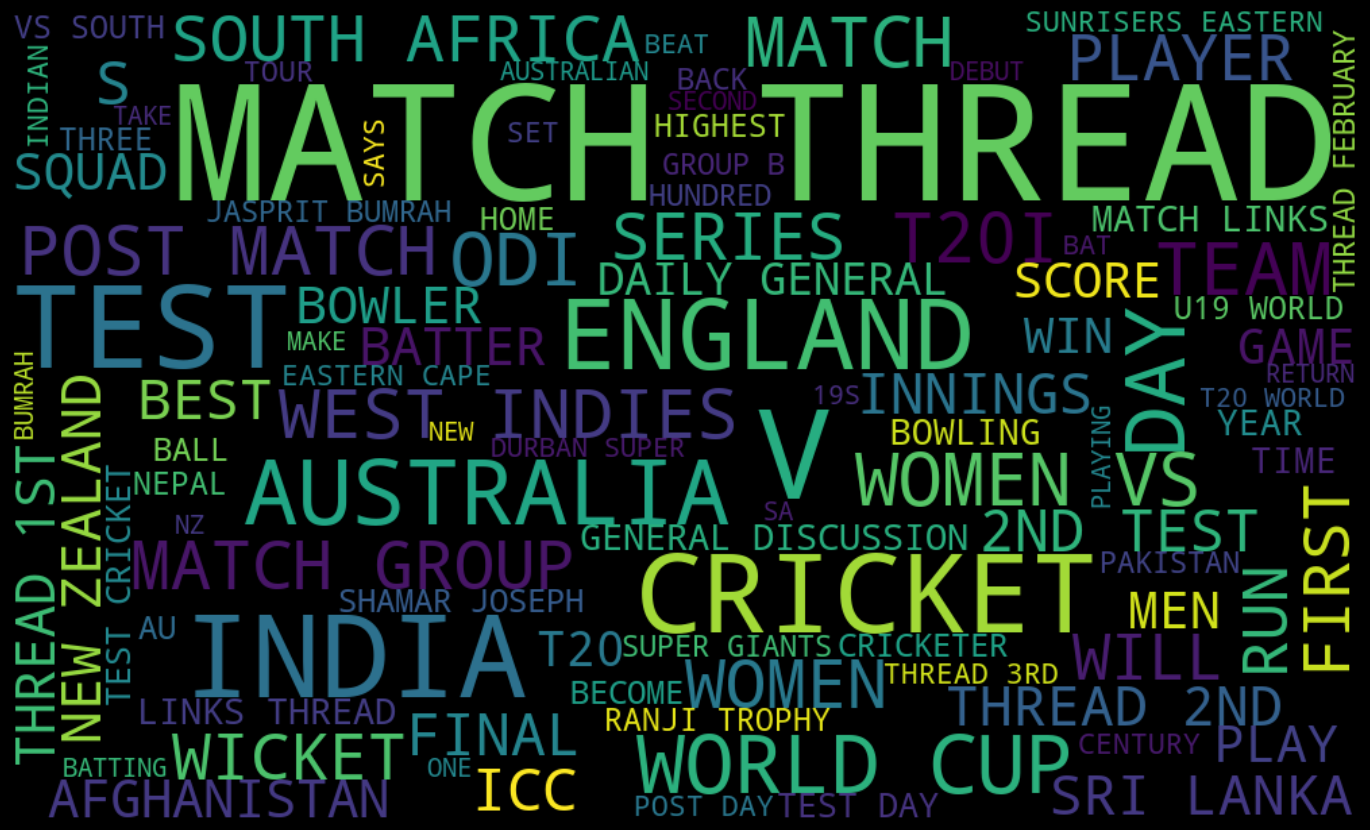

In [165]:
text = ' '.join( [twts for twts in cricket_df['Titles']] ) #To join all tweet
    # generate word cloud 
wordcloud = WordCloud(width=1000, height = 600,
                      
                      max_words = 100,
                      stopwords = STOPWORDS,
                      background_color="black").generate(text)

  # Display the generated image:
plt.figure( figsize=(20,10), facecolor='k' )
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off");